In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import requests
import sqlite3

In [2]:
df = pd.read_csv("train.csv")


In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)


Shape: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Load Data from JSON

In [8]:
json_data = [
    {"product_id": 1, "name": "Laptop", "price": 60000},
    {"product_id": 2, "name": "Mobile", "price": 25000},
    {"product_id": 3, "name": "Tablet", "price": 18000}
]

json_df = pd.DataFrame(json_data)
json_df

,product_id,name,price
0,1,Laptop,60000
1,2,Mobile,25000
2,3,Tablet,18000


Load Data from SQL Database (SQLite)

In [9]:
conn = sqlite3.connect("sample.db")
cursor = conn.cursor()

In [10]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS employees (
    id INTEGER,
    name TEXT,
    department TEXT,
    salary INTEGER
)
""")


In [11]:
cursor.executemany("""
INSERT INTO employees VALUES (?, ?, ?, ?)
""", [
    (1, "Amit", "IT", 60000),
    (2, "Neha", "HR", 45000),
    (3, "Rahul", "Finance", 70000),
    (4, "Pooja", "IT", 65000),
    (5, "Ankit", "Sales", 50000)
])


In [12]:
conn.commit()

In [13]:
sql_df = pd.read_sql("SELECT * FROM employees", conn)
sql_df


,id,name,department,salary
0,1,Amit,IT,60000
1,2,Neha,HR,45000
2,3,Rahul,Finance,70000
3,4,Pooja,IT,65000
4,5,Ankit,Sales,50000


In [14]:
conn.close()


##PART 2: Data Preprocessing & Cleaning (Titanic Dataset)

In [15]:
df.shape

(891, 12)

In [16]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [22]:
numerical_cols = df.select_dtypes(include=np.number).columns

categorical_cols = df.select_dtypes(include='object').columns

numerical_cols, categorical_cols

(Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'),
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))

In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##Data Cleaning

In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3997015337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3997015337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [26]:
df.drop_duplicates(inplace=True)

In [29]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [34]:
df['survived'] = df['survived'].astype(int)

In [35]:
df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        891 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Feature Preparation (Basic)

In [42]:
df_encoded = pd.get_dummies(df)
df_encoded

,passengerid,survived,pclass,age,sibsp,parch,fare,"name_Abbing, Mr. Anthony","name_Abbott, Mr. Rossmore Edward","name_Abbott, Mrs. Stanton (Rosa Hunt)",...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,28.0,1,2,23.4500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [44]:
df_encoded

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,sex_male,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,B96 B98,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


In [45]:
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

##Exploratory Data Analysis (EDA)

##Numerical columns

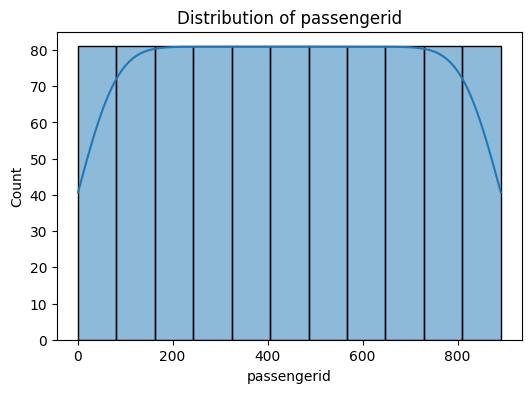

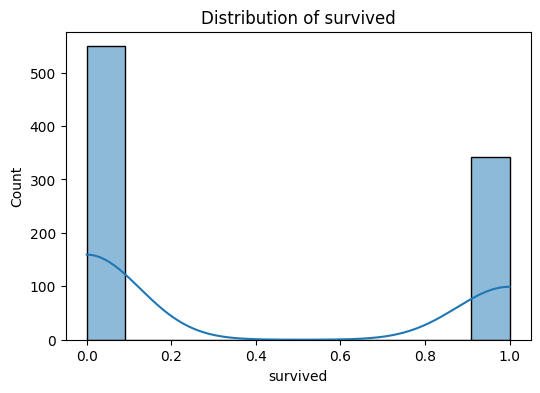

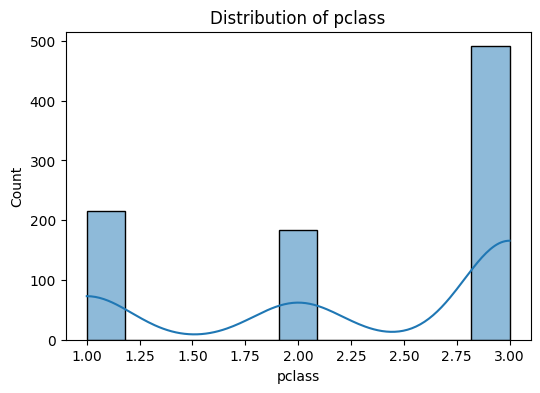

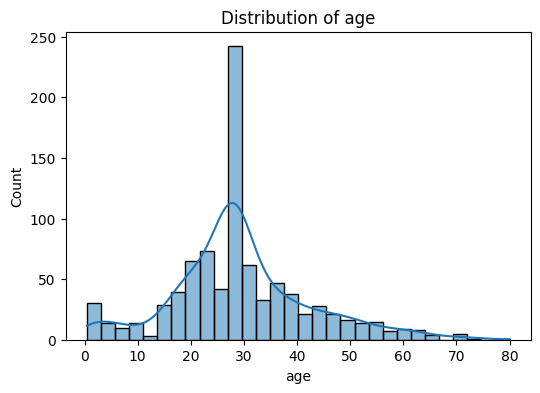

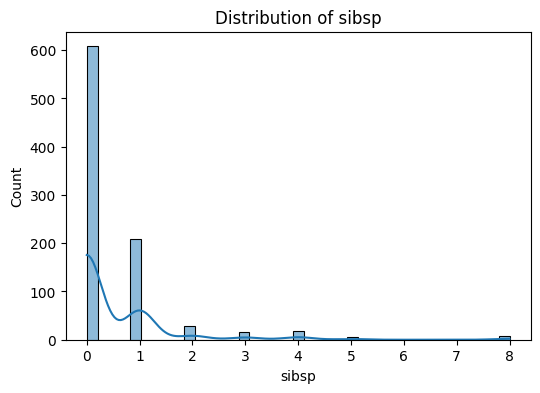

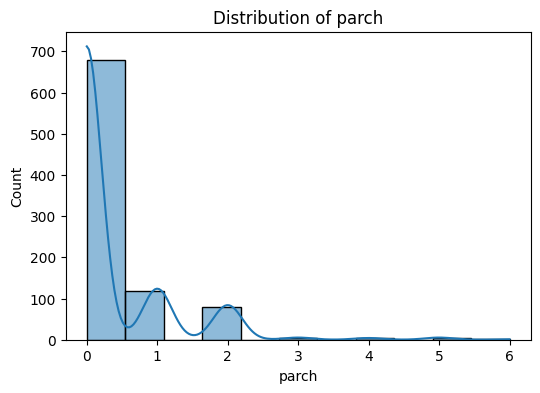

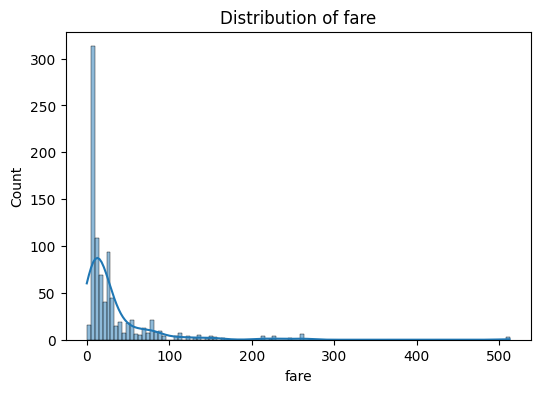

In [62]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

##Categorical columns

In [66]:
print(categorical_cols)
print(df.columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [68]:
df.columns = df.columns.str.lower()  # all columns lowercase
categorical_cols = [col.lower() for col in categorical_cols]
categorical_cols

['name', 'sex', 'ticket', 'cabin', 'embarked']

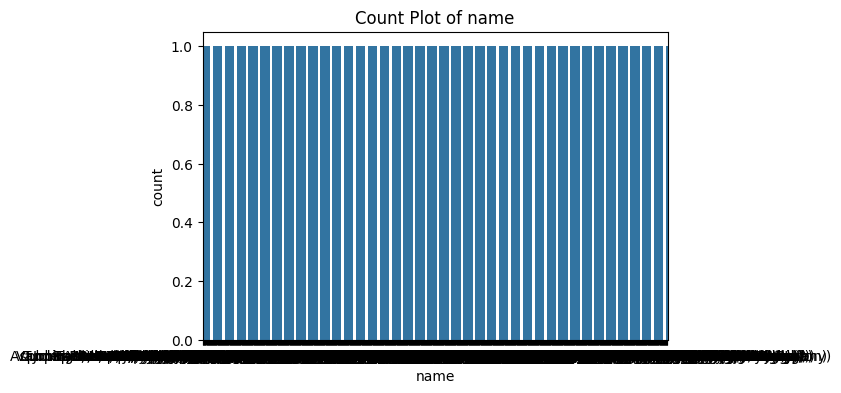

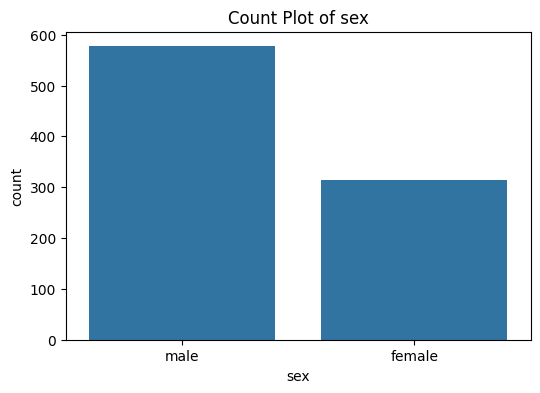

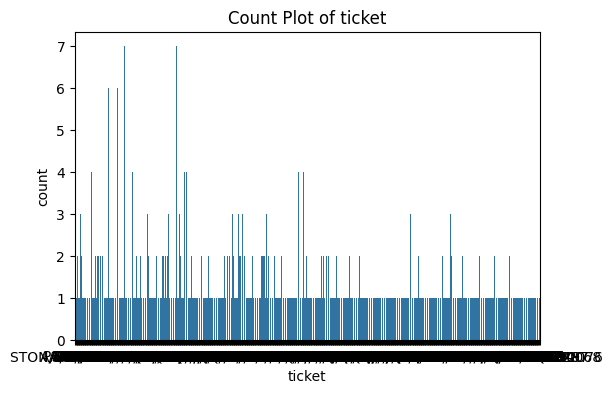

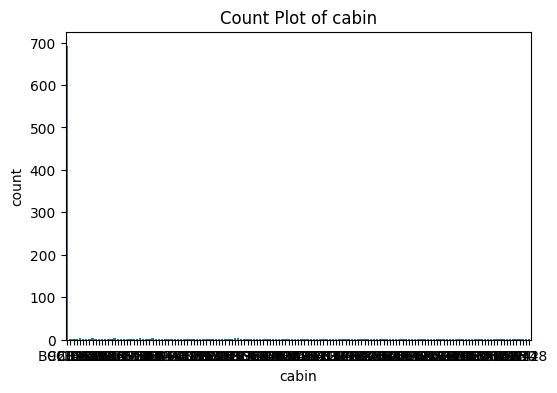

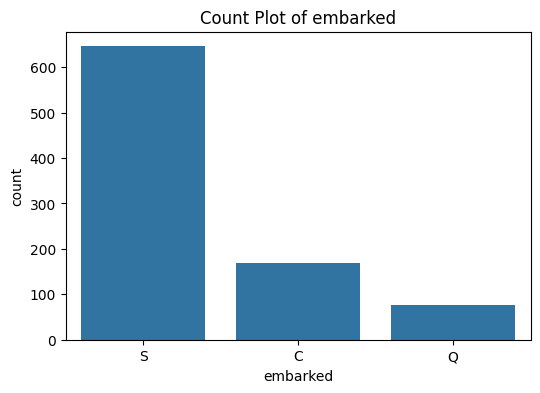

In [69]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()

##Outliers

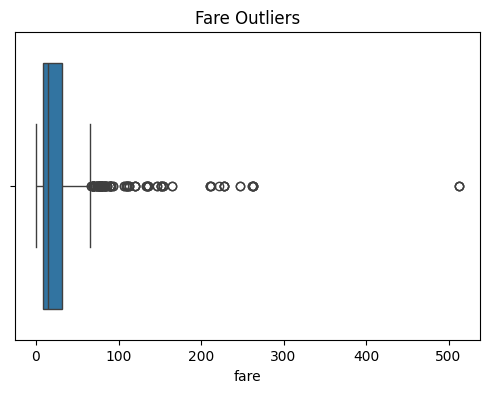

In [70]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare'])
plt.title("Fare Outliers")
plt.show()

##Bivariate Analysis

###Numerical vs Numerical

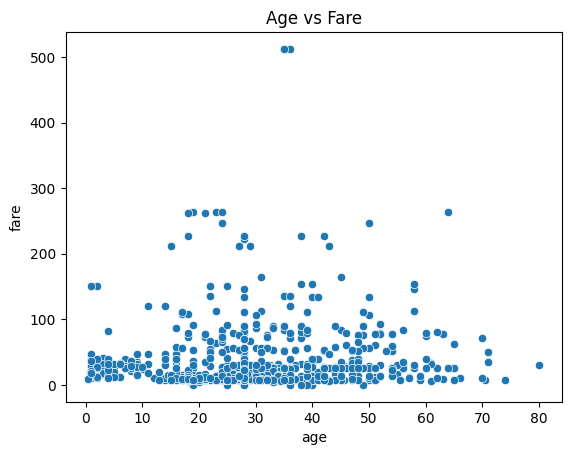

In [71]:
sns.scatterplot(x=df['age'], y=df['fare'])
plt.title("Age vs Fare")
plt.show()


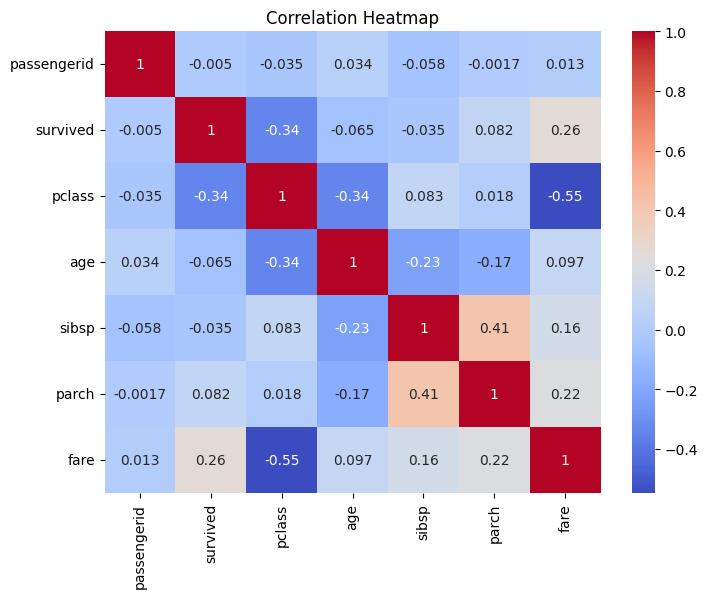

In [72]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###Categorical vs Numerical

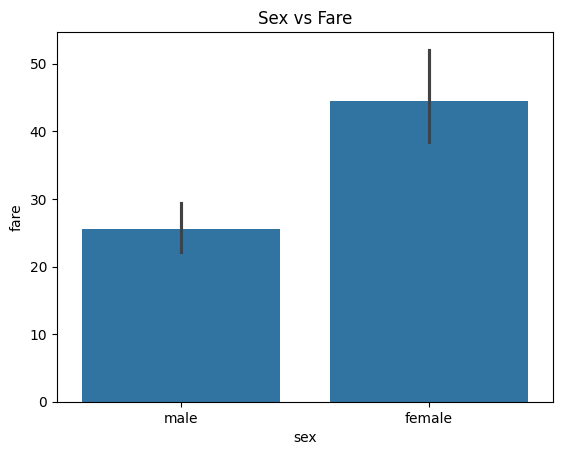

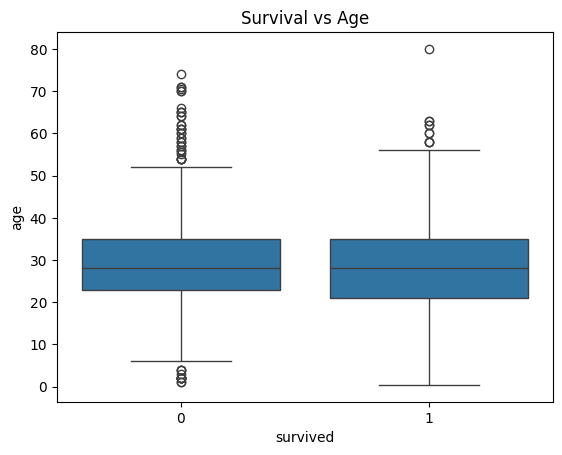

In [73]:
sns.barplot(x=df['sex'], y=df['fare'])
plt.title("Sex vs Fare")
plt.show()

sns.boxplot(x=df['survived'], y=df['age'])
plt.title("Survival vs Age")
plt.show()